# Ходырев Федор 3821Б1ПР1


# 31. Аппроксимация данных. Логистическая функция.

[Weiner B. Discovering Psychology. 1977]

В таблице представлены средние значения количества слов **y**, которыми владеет ребенок в заданном возрасте **t**.

      t         y
     -------------- 
     1.0        3
     1.5       22
     2.0      272
     2.5      446
     3.0      896
     3.5     1222
     4.0     1540
     4.5     1870
     5.0     2072
     6.0     2562

Построить линейную $y = \beta_0 + \beta_1x$  и две логистические модели:

$$
    y = \frac{\beta_0}{1 + \beta_1e^{-\beta_2t}},        y = \frac{\beta_0}{1+\beta_1e^{-\beta_2(t-t_0)}},  
$$

аппроксимирующие данные.
Найти общую ошибку в каждом из этих случаев и сравнить результаты

## Подключение необходимых библиотек

In [1]:
import numpy as np # Библиотека для работы с массивами, матрицами
import matplotlib.pyplot as plt # Библиотека для работы с графикой
from scipy import linalg # Библиотека, позволяющая использовать операции из линейной алгебры
from scipy import optimize # Библиотека, содержащая в себе функцию curve_fit, которая в свою очередь позволяет аппроксимировать функцию методом наименьших квадратов 

## Графическое изображение исходных данных
Для начала зададим начальные значения и изобразим их на графике 

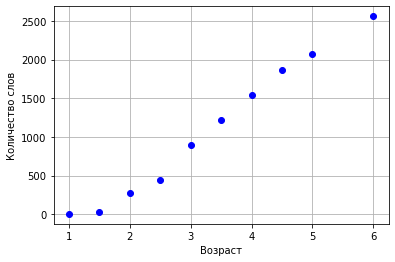

In [2]:
x = np.array([1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0]) # Массив, содежащий значения возраста
y = np.array([3,22,272,446,896,1222,1540,1870,2072,2562]) # Массив,содрежащий кол-во слов,соответствующих определенному возрасту
srlen = len(x) # Переменная srlen хранит в себе длину массива x, в будущем она нам пригодится для нахождения общей ошибки
plt.plot(x,y,'o',color = 'blue')
plt.xlabel('Возраст')
plt.ylabel('Количество слов')
plt.grid()
pass

## Простая линейная регрессия (линейный МНК)

Целевая(базовая) функция lin - для линейной $y = \beta_0 + \beta_1x$

In [3]:
def lin(beta0, t, beta1):
    return beta0 + beta1 * t

Для нахождения параметров $\beta_0$ и $\beta_1$ воспользуемся функцией polyfit из библиотеки NumPy

In [4]:
linel = np.polyfit(x,y,1)
beta0 = linel[1]
beta1 = linel[0]
print("Найденные коэффициенты равны:",beta0,beta1)

Найденные коэффициенты равны: -763.8571428571419 561.9264069264067


Построим график для функции с найденными параметрами $\beta_0$ и $\beta_1$:

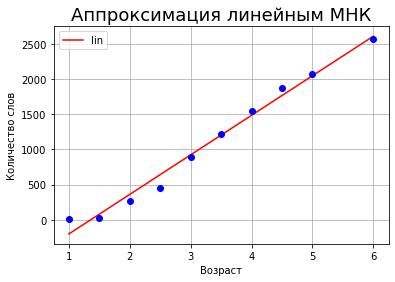

In [5]:
mimax = np.linspace(np.min(x), np.max(x), 10)
plt.plot(mimax ,lin(beta0,mimax,beta1), '-', color = 'red', label = 'lin')
plt.title('Аппроксимация линейным МНК', size = 18)
plt.xlabel('Возраст')
plt.ylabel('Количество слов')
plt.plot(x,y,'o', color = 'blue')
plt.legend()
plt.grid()
pass

## Нелинейный метод наименьших квадратов (нелинейный МНК)
Данную задачу минимизации решаем с помощью численных методов. Для этого воспользуемся функцией curve_fit из модуля numpy.optimize

### Первая логистическая модель

Целевая(базовая) функция mod1 - для логистической модели $y = \frac{\beta_0}{1 + \beta_1e^{-\beta_2t}}$

In [6]:
def mod1(t,beta0, beta1, beta2):
    return beta0 / (1 + beta1 * np.exp(-beta2*t))

Предполагаемые начальные значения коэффициентов, которые я получил методом подбора:

In [7]:
arr = [1,2,3]

Так как функция curve_fit на выход подает два массива, из которых нам нужен только первый, то в качестве переменной, принимающей второй массив, поставим прочерк. В функции curve_fit первый параметр - целевая функция, второй и третий - набор начальных значений, четвертый - набор предполагаемых коэффициентов.

In [8]:
params1, _= optimize.curve_fit(mod1,x,y,arr)
bbeta0, bbeta1, bbeta2 = params1
print("Найденные коэффициенты равны:", bbeta0, bbeta1, bbeta2)

Найденные коэффициенты равны: 2612.693117576391 95.76932605651045 1.2364085878085078


Построим график для функции с найденными коэффициантами:

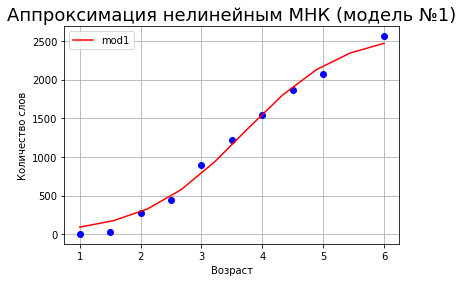

In [9]:
mimax = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o', color = 'blue')
plt.plot(mimax, mod1(mimax,bbeta0, bbeta1, bbeta2),'-', color = 'red', label='mod1')
plt.title('Аппроксимация нелинейным МНК (модель №1)', size = 18)
plt.xlabel('Возраст')
plt.ylabel('Количество слов')
plt.legend()
plt.grid()
pass

### Вторая логистическая модель
Для данной модели также используем функцию curve_fit.

Целевая(базовая) функция mod2 - для логистической модели $y = \frac{\beta_0}{1+\beta_1e^{-\beta_2(t-t_0)}}$

In [10]:
def mod2(t,t0,beta0, beta1, beta2):
    return beta0 / (1 + beta1 * np.exp(-beta2*(t - t0)))

Предполагаемые начальные значения коэффициентов, которые я получил методом подбора:

In [11]:
arr2 = [1, 2, 10000, 0.00001] 

Путем подбора параметра maxfev было выявлено, что, начиная со значения 197,функция curve_fit выдает нам правильные коэффициенты. В функции curve_fit первый параметр - целевая функция, второй и третий - набор начальных значений, четвертый - набор предполагаемых коэффициентов,пятый - лимит на кол-во вычислений.

In [12]:
params2, _ = optimize.curve_fit(mod2, x, y, arr2, maxfev = 197) 
t0, bbbeta0, bbbeta1, bbbeta2 = params2
print("Найденные коэффициенты равны:", t0, bbbeta0, bbbeta1, bbbeta2)

Найденные коэффициенты равны: 0.6548555499656031 2612.688226442009 42.618688005061706 1.2364179673483682


Построим график для функции с найденными коэффициентами:

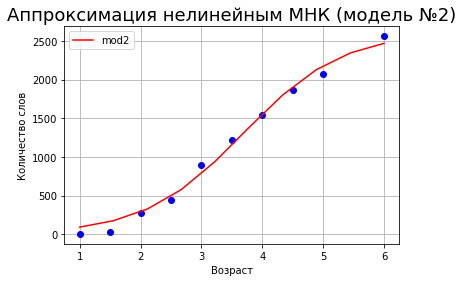

In [13]:
mimax = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o', color = 'blue')
plt.plot(mimax, mod2(mimax,t0,bbbeta0, bbbeta1, bbbeta2),'-', color = 'red', label='mod2')
plt.title('Аппроксимация нелинейным МНК (модель №2)', size = 18)
plt.xlabel('Возраст')
plt.ylabel('Количество слов')
plt.legend()
plt.grid()
pass

# Сравнение всех аппроксимирующих функций на одном графике
Для удобства сравнения всех трех аппроксимирующих функций изобразим их на одном графике


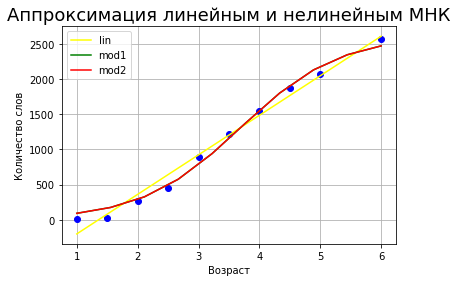

In [14]:
mimax = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o', color = 'blue')
plt.plot(mimax, lin(beta0,mimax,beta1), '-', color = 'yellow', label = 'lin')
plt.plot(mimax, mod1(mimax,bbeta0, bbeta1, bbeta2),'-', color = 'green', label='mod1')
plt.plot(mimax, mod2(mimax,t0,bbbeta0, bbbeta1, bbbeta2),'-', color = 'red', label='mod2')
plt.title('Аппроксимация линейным и нелинейным МНК', size = 18)
plt.xlabel('Возраст')
plt.ylabel('Количество слов')
plt.legend()
plt.grid()
pass

Уже из графика можно сделать вывод, что логистические модели аппроксимируют функцию лучше, чем линейная модель

## Нахождение общей ошибки для каждого случая
Чтобы окончательно убедиться в том, что логистические модели лучше линейных аппроксимируют функции, найдем общую ошибку в каждом случае.
Под общей ошибкой подразумевается средний квадрат ошибки. Вместо возведения в квадрат можно было использовать модуль.

### 1)Общая ошибка для линейной модели $y = \beta_0 + \beta_1x$

In [15]:
osh1 = np.array(y - lin(beta0,x,beta1))**2
print('Общая ошибка =',np.sum(osh1)/srlen)

Общая ошибка = 10903.27748917749


### 2)Общая ошибка для первой логистической модели $y = \frac{\beta_0}{1 + \beta_1e^{-\beta_2t}}$

In [16]:
osh2 = np.array(y - mod1(x,bbeta0, bbeta1, bbeta2))**2
print('Общая ошибка =',np.sum(osh2)/srlen)

Общая ошибка = 6971.830188795667


### 3)Общая ошибка для второй логистической модели $y = \frac{\beta_0}{1+\beta_1e^{-\beta_2(t-t_0)}}$

In [17]:
osh3 = np.array(y - mod2(x,t0,bbbeta0, bbbeta1, bbbeta2))**2
print('Общая ошибка =',np.sum(osh3)/srlen)

Общая ошибка = 6971.830200078248


## Подведение итогов (вывод)
После выполнения данной задачи, я сделал следующие выводы:

1)Исходя из графиков функции, логистические модели аппроксимируют намного лучше линейной модели.

2)Исходя из найденных ошибок, логистические модели показали практически одинаковый результат.

3)Ошибка у линейной модели больше, чем у обоих логистических моделей. Это еще одно доказательство, что она аппроксимирует данные хуже логистических моделей
